La régression par un perceptron multi-couche sera illustrée dans un Jupyter Notebook sur l'exemple du Boston House Prices Dataset. Inspirez-vous de la ligne de code suivante (sklearn) :

MLPRegressor(hidden_layer_sizes='à définir', activation='à définir', solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=1500)


In [10]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
# Charger l'ensemble de données
data = fetch_california_housing()

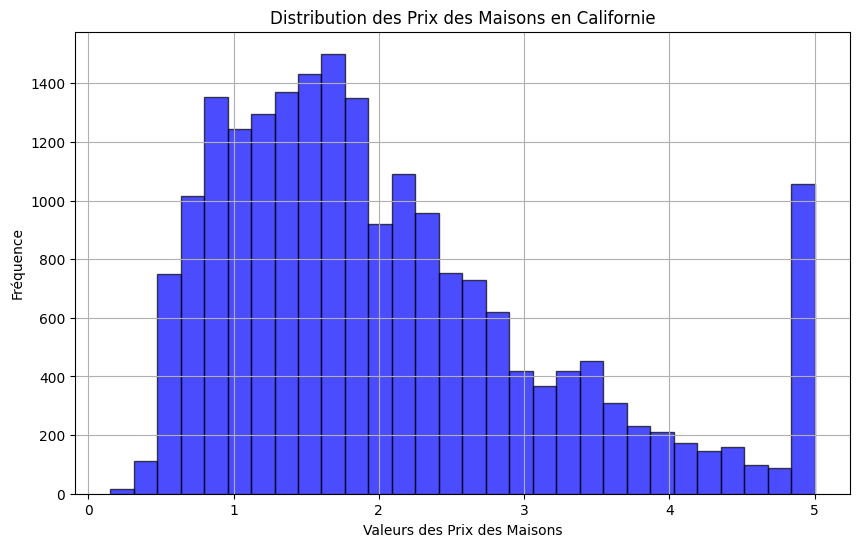

In [12]:
# Exploration des données (visualisation)
plt.figure(figsize=(10, 6))
plt.hist(data.target, bins=30, alpha=0.7, color='b', edgecolor='black')
plt.xlabel('Valeurs des Prix des Maisons')
plt.ylabel('Fréquence')
plt.title('Distribution des Prix des Maisons en Californie')
plt.grid(True)
plt.show()

In [13]:
# Definition des features et target
X = data.data
y = data.target

In [14]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [15]:
# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Définition de la grille d'hyperparamètres
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000, 1500]
}

In [17]:
# Recherche en grille avec cross-validation
grid_search = GridSearchCV(MLPRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
                         'max_iter': [500, 1000, 1500]})

In [18]:
# Meilleur modèle après la recherche en grille
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [19]:
# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des métriques d'évaluation
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 0.26
R² Score: 0.80


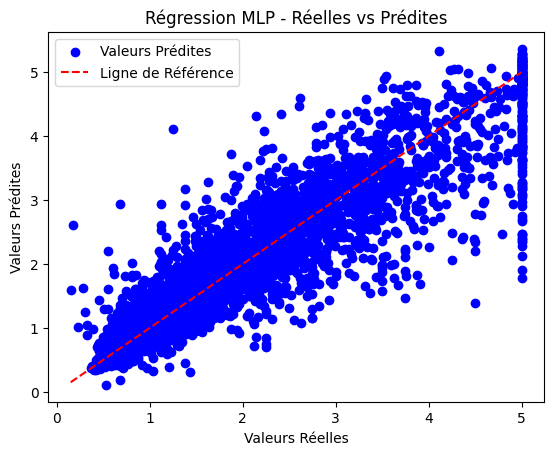

In [21]:
# Tracer les valeurs réelles par rapport aux valeurs prédites en utilisant des couleurs différentes
plt.scatter(y_test, y_pred, color='blue', label='Valeurs Prédites')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ligne de Référence')
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("Régression MLP - Réelles vs Prédites")
plt.legend()
plt.show()